In [ ]:
# TODO : Import necessary python libraries needed for this project

# For Data preparation and manipulation
import numpy as np
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# Set Seaborn styles
sb.set()

In [ ]:
# For implementing pipeline
from sklearn.pipeline import Pipeline

# For Scaling the data
from sklearn.preprocessing import StandardScaler

# For Classification
from sklearn.neighbors import KNeighborsClassifier

# For Splitting the data for training and Validation
from sklearn.model_selection import train_test_split

# For creating model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Principal Component Analysis for Dimensionality Reduction
from sklearn.decomposition import PCA

# For Shuffling the DataFrame
from sklearn.utils import shuffle

In [ ]:
# TODO : Load previous individuals loan data
loan_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [ ]:
# TODO : Let's know how many factors of an individual and Number of Samples
print("The Loan Prediction Dataset has")
print("\t\tNumber of Factors : \t", loan_train.shape[1] - 1)
print("\t\tNumber of Samples : \t", loan_train.shape[0])

The Loan Prediction Dataset has
		Number of Factors : 	 12
		Number of Samples : 	 614


#EXPLORATORY DATA ANALYSIS

In [ ]:
# TODO : Descriptive Statistics on Loan Data
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# TODO : Print the factors of Loan Data
print('Loan Data Factors : \n')
j = 1
for i in loan_train.columns:
    print(j, '.', i)
    j += 1

Loan Data Factors : 

1 . Loan_ID
2 . Gender
3 . Married
4 . Dependents
5 . Education
6 . Self_Employed
7 . ApplicantIncome
8 . CoapplicantIncome
9 . LoanAmount
10 . Loan_Amount_Term
11 . Credit_History
12 . Property_Area
13 . Loan_Status


# Check dataset is balanced or imbalanced

In [ ]:
loan_train['Loan_Status'].isnull().sum()


0

In [ ]:
# TODO : To get unique values and value_counts on Loan_Status
print("Unique values : ", loan_train['Loan_Status'].unique())
print("Unique values counts : \n", loan_train['Loan_Status'].value_counts())

Unique values :  ['N' 'Y']
Unique values counts : 
 Y    324
N    192
Name: Loan_Status, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

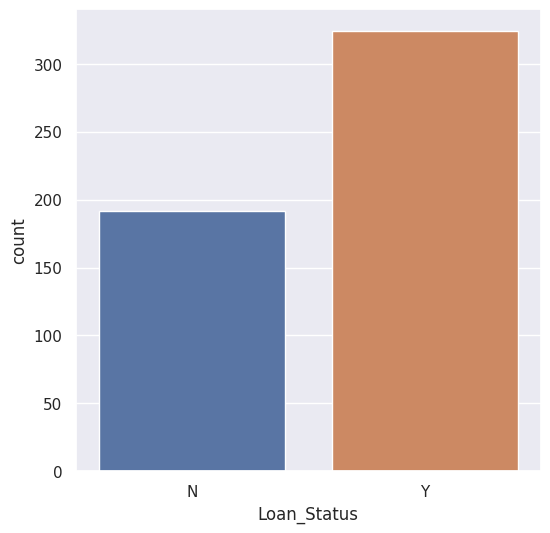

In [ ]:
# Let's plot the Unique value counts
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Loan_Status', data = loan_train)
# plt.savefig('../images/loan_status_counts.png')

# Remove the samples having null value in any the col, and Loan_Status must be YES

In [ ]:
loan_train.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents            6
Education             0
Self_Employed         9
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           11
Loan_Amount_Term      6
Credit_History       13
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_train.shape


(516, 13)

#Loan_ID

In [ ]:
# 1. Loan ID
loan_train['Loan_ID'].describe()


count          516
unique         516
top       LP001003
freq             1
Name: Loan_ID, dtype: object

#Gender

In [ ]:
# TODO : Describe Gender column
loan_train['Gender'].describe()

count      511
unique       2
top       Male
freq       422
Name: Gender, dtype: object

In [ ]:
print("Number of null values : ", loan_train['Gender'].isnull().sum())
print("Unique values : ", loan_train['Gender'].unique())
print("Value counts : \n", loan_train['Gender'].value_counts())


Number of null values :  5
Unique values :  ['Male' 'Female' nan]
Value counts : 
 Male      422
Female     89
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

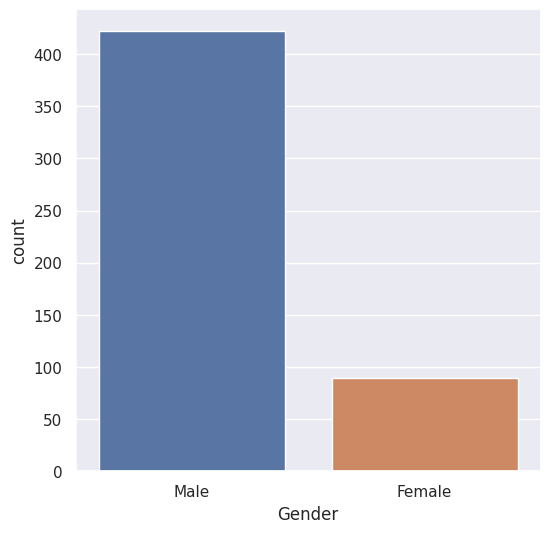

In [ ]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = loan_train)
# plt.savefig('../images/gender_counts_0.png')

In [ ]:
# TODO : Print the samples having null values in gender column
samples_with_null_values_on_gender_column = loan_train[loan_train['Gender'].isnull()]
samples_with_null_values_on_gender_column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
266,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
397,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
423,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N
483,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N


Drop the samples having "yes" on Loan_Status

In [ ]:
# Initialize Gender predictor columns list
GENDER_PREDICTOR_COLUMNS = ['Dependents', 'ApplicantIncome', 'LoanAmount', 'Property_Area', 'Gender']

# Let's get the rows not having null values on gender column
samples_without_null_values_on_gender_column = loan_train[~loan_train['Gender'].isnull()][GENDER_PREDICTOR_COLUMNS]
print("Number of Samples Before dropping samples having null values in predictor columns for Gender column: ",
     samples_without_null_values_on_gender_column.shape[0])

# Dropping samples having null values in predictor columns
samples_without_null_values_on_gender_column = samples_without_null_values_on_gender_column.dropna(how = 'any')
print("Number of Samples After dropping samples having null values in predictor columns for Gender column: ",
     samples_without_null_values_on_gender_column.shape[0])

# Conveting categorical values on Dependents column to numerical values
samples_without_null_values_on_gender_column['Dependents'] = samples_without_null_values_on_gender_column['Dependents'].apply(
    lambda x : {'0': 0, '1':1, '2':2, '3+':3}[x]
)
# Conveting categorical values on Property_Area column to numerical values
samples_without_null_values_on_gender_column['Property_Area'] = samples_without_null_values_on_gender_column['Property_Area'].apply(
    lambda x : {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[x]
)

# Building Gender Predictor using Pipeline and KNeigborsClassifiers
Gender_predictor = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('gen_predictor', KNeighborsClassifier(n_neighbors = 1))
])
Gender_predictor.fit(samples_without_null_values_on_gender_column.iloc[:, :-1].values,
                    samples_without_null_values_on_gender_column.iloc[:, -1].values)

Number of Samples Before dropping samples having null values in predictor columns for Gender column:  511
Number of Samples After dropping samples having null values in predictor columns for Gender column:  494


Pipeline(steps=[('scaler', StandardScaler()),
                ('gen_predictor', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
# Function which fills null values on Gender column
def gender_null_value_filler(df, Gender_predictor):
    for row in range(df.shape[0]):
        if df.loc[row, 'Gender'] is np.nan:
            X = loan_train.loc[row, GENDER_PREDICTOR_COLUMNS[:-1]].values.reshape(1, -1)
            X[0][0] = {'0': 0, '1':1, '2':2, '3+':3}[X[0][0]]
            X[0][3] = {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[X[0][3]]
            df.loc[row, 'Gender'] = Gender_predictor.predict(X)
    return df

In [ ]:
# TODO : Filling null values on Gender columns optimally
loan_train = gender_null_value_filler(loan_train, Gender_predictor)


In [ ]:
# Check the type for a few random entries in 'Gender' column
print("Type for a few random entries in 'Gender' column:")
for value in loan_train['Gender'].sample(5, random_state=1):
    print(type(value))

# Check if there are any arrays present in 'Gender' column
print("\nChecking for arrays in 'Gender' column:")
print(any(isinstance(value, np.ndarray) for value in loan_train['Gender']))


Type for a few random entries in 'Gender' column:
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>

Checking for arrays in 'Gender' column:
True


In [ ]:
# Convert NumPy arrays to strings in 'Gender' column
loan_train['Gender'] = loan_train['Gender'].apply(lambda x: str(x))

# Encoding Gender Column - Male: 1, Female: 0
gender_mapping = {'Male': 1, 'Female': 0}

loan_train['Gender'] = loan_train['Gender'].map(gender_mapping)
loan_train['Gender'] = loan_train['Gender'].fillna(-1).astype(int)


#Married

In [ ]:
# TODO : Describing Married column
loan_train['Married'].describe()

count     516
unique      2
top       Yes
freq      334
Name: Married, dtype: object

In [ ]:
print("Number of null values : ", loan_train['Married'].isnull().sum())
print("Unique values : ", loan_train['Married'].unique())
print("Value counts : \n", loan_train['Married'].value_counts())

Number of null values :  0
Unique values :  ['Yes' 'No']
Value counts : 
 Yes    334
No     182
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

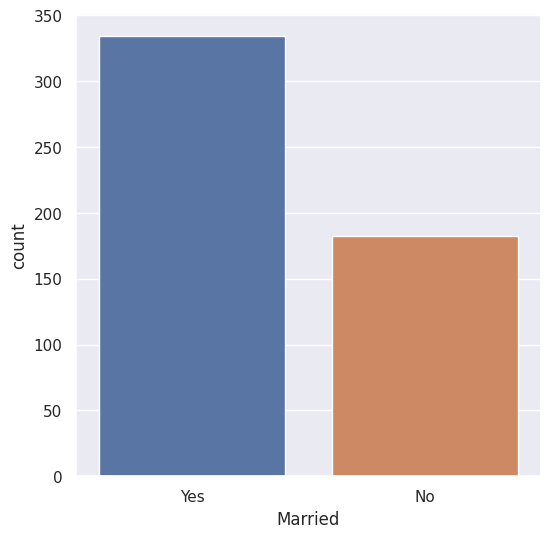

In [ ]:
# Let's plot the Unique value counts
plt.figure(figsize = (6, 6))
sb.countplot(x = 'Married', data = loan_train)
# plt.savefig('../images/married_counts_0.png')

In [ ]:
# TODO : Print the samples having null values in gender column
samples_with_null_values_on_gender_column = loan_train[loan_train['Married'].isnull()]
samples_with_null_values_on_gender_column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
loan_train[loan_train['Married'] == 'Yes'].describe(include = 'all').iloc[:, :]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,334,334.0,334,330,334,329,334.000000,334.000000,327.000000,330.000000,326.000000,334,334
unique,334,NaN,1,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001003,NaN,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,NaN,334,140,260,286,NaN,NaN,NaN,NaN,NaN,128,221
mean,NaN,-1.0,NaN,NaN,NaN,NaN,5144.110778,1764.332096,149.067278,337.672727,0.828221,NaN,NaN
std,NaN,0.0,NaN,NaN,NaN,NaN,5514.953584,2055.976088,71.811583,65.891609,0.377768,NaN,NaN
min,NaN,-1.0,NaN,NaN,NaN,NaN,150.000000,0.000000,17.000000,60.000000,0.000000,NaN,NaN
25%,NaN,-1.0,NaN,NaN,NaN,NaN,2883.750000,0.000000,108.000000,360.000000,1.000000,NaN,NaN
50%,NaN,-1.0,NaN,NaN,NaN,NaN,3832.000000,1611.000000,132.000000,360.000000,1.000000,NaN,NaN
75%,NaN,-1.0,NaN,NaN,NaN,NaN,5741.000000,2431.250000,175.000000,360.000000,1.000000,NaN,NaN


In [ ]:
# Let's fill null values in Married columns with 'Yes'
loan_train['Married'] = loan_train['Married'].fillna('Yes')

In [ ]:
# TODO : To know the unique value counts
loan_train['Married'].value_counts()

Yes    334
No     182
Name: Married, dtype: int64

In [ ]:
# TODO : encoding categorical values into numerical values
loan_train['Married'] = loan_train['Married'].apply(lambda x : {'Yes'})

#Dependents

In [ ]:
# TODO : Describing Dependents column
loan_train['Dependents'].describe()

count     510
unique      4
top         0
freq      291
Name: Dependents, dtype: object

In [ ]:
print("Number of null values : ", loan_train['Dependents'].isnull().sum())
print("Unique values : ", loan_train['Dependents'].unique())
print("Value counts : \n", loan_train['Dependents'].value_counts())

Number of null values :  6
Unique values :  ['1' '0' '2' '3+' nan]
Value counts : 
 0     291
2      89
1      85
3+     45
Name: Dependents, dtype: int64


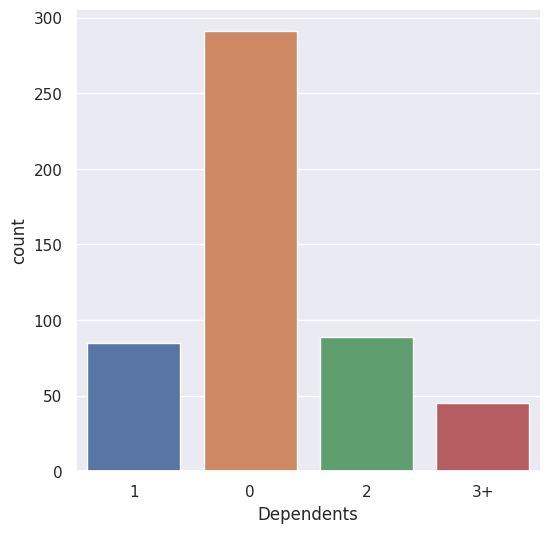

In [ ]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Dependents', data = loan_train)
# plt.savefig('../images/dependents_counts_0.png')
plt.show()

In [ ]:
# TODO : Display the 15 rows having null values in Dependents column
loan_train[loan_train['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
189,LP001754,-1,{Yes},NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
249,LP001945,-1,{Yes},NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
288,LP002130,-1,{Yes},NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N
433,LP002682,-1,{Yes},NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N
478,LP002847,-1,{Yes},NaN,Graduate,No,5116,1451.0,165.0,360.0,0.0,Urban,N
501,LP002943,-1,{Yes},NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


In [ ]:
# TODO : Function for filling null values on dependents columns
def dependents_null_value_filler(df):
    for row in range(df.shape[0]):
        if df.loc[row, 'Dependents'] is np.nan:
            df.loc[row, 'Dependents'] = str(df.loc[row, 'Married'])
    return df

In [ ]:
# TODO : Fill null values on Dependents column
loan_train = dependents_null_value_filler(loan_train)

In [ ]:
# TODO : Encoding Categorical data into NUmerical Data
loan_train['Dependents'] = loan_train['Dependents'].apply(lambda x : {'0'})

#Education

In [ ]:
# TODO : Descriptive Statistics on EDucation columns
loan_train['Education'].describe()

count          516
unique           2
top       Graduate
freq           403
Name: Education, dtype: object

In [ ]:
# TODO : Number of nul values on Education column
loan_train['Education'].isnull().sum()

0

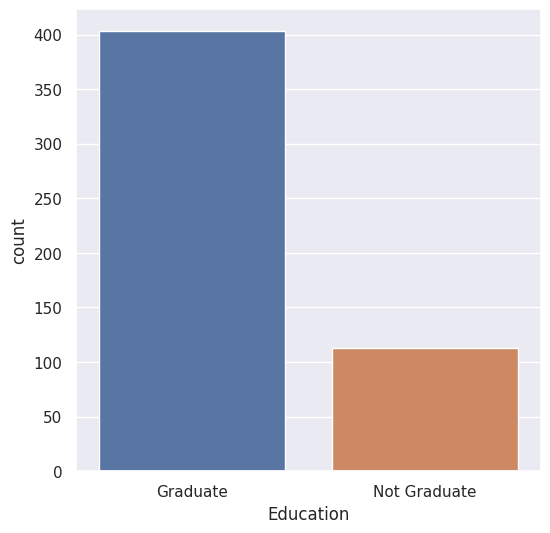

In [ ]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Education', data = loan_train)
# plt.savefig('../images/education_counts_0.png')
plt.show()

In [ ]:
# TODO : Encoding categorical data into Numerical data
loan_train['Education'] = loan_train['Education'].apply(lambda x : {'Graduate' : 1, 'Not Graduate' : 0}[x])


#Self_Employed

In [ ]:
# TODO : Descriptive Statistics on Self_Employed column
loan_train['Self_Employed'].describe()

count     507
unique      2
top        No
freq      441
Name: Self_Employed, dtype: object

In [ ]:
# TODO : Uniques and Values count on Self_Employed column
print("Number of null values : ", loan_train['Self_Employed'].isnull().sum())
print("Unique values : ", loan_train['Self_Employed'].unique())
print("Value counts : \n", loan_train['Self_Employed'].value_counts())

Number of null values :  9
Unique values :  ['No' 'Yes' nan]
Value counts : 
 No     441
Yes     66
Name: Self_Employed, dtype: int64


In [ ]:
# TODO : Filling Null values with No on Self_Employed column
loan_train['Self_Employed'].fillna(value = 'No', inplace = True)

# TODO : Encoding Self_Employed as 1 and Not Self_Employed as 0
loan_train['Self_Employed'] = loan_train['Self_Employed'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])

#Applicant Income

In [ ]:
# TODO : Descriptive Statistics on Applicant Income
loan_train['ApplicantIncome'].describe()


count      516.000000
mean      5036.879845
std       4840.043801
min        150.000000
25%       2893.500000
50%       3839.500000
75%       5731.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [ ]:
# TODO : Check for null values on ApplicantIncome column
loan_train['ApplicantIncome'].isnull().sum()

0

<ipython-input-82-7bb621ff522b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(loan_train['ApplicantIncome'], rug = True, bins = 100, color='r')


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

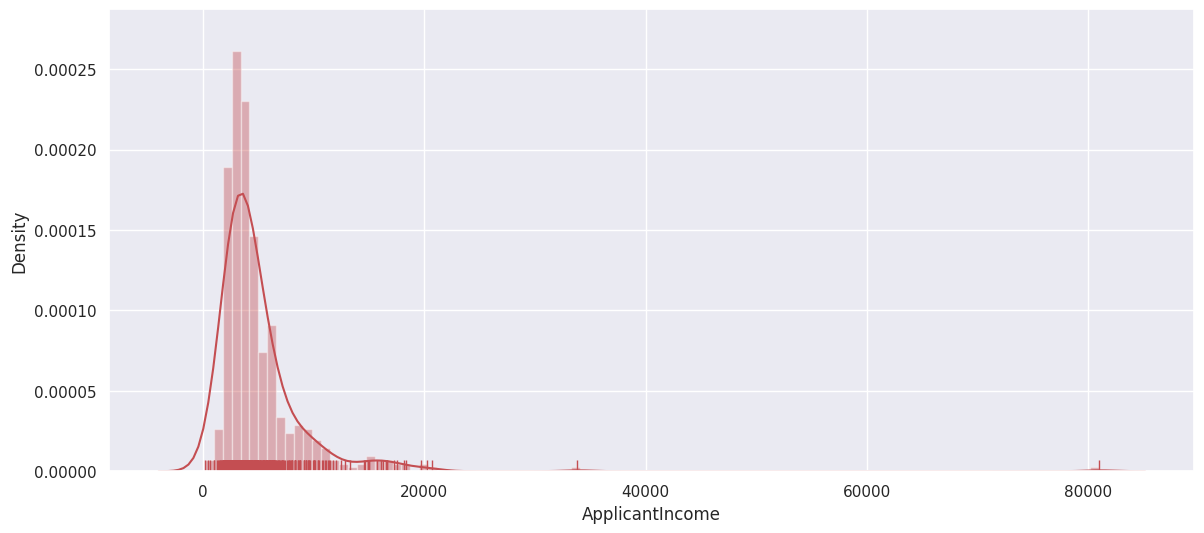

In [ ]:
# TODO : Distribution of Applicant Income

plt.figure(figsize = (14, 6))
sb.distplot(loan_train['ApplicantIncome'], rug = True, bins = 100, color='r')
# plt.savefig('../images/ApplicantIncomeDistribution.png')

In [ ]:
# TODO : Displaying the applicants having income more than 20,000
loan_train[loan_train['ApplicantIncome'] > 20000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
153,LP001637,-1,{Yes},{0},1,0,33846,0.0,260.0,360.0,1.0,Semiurban,N
240,LP001922,-1,{Yes},{0},1,0,20667,0.0,NaN,360.0,1.0,Rural,N
262,LP001996,-1,{Yes},{0},1,0,20233,0.0,480.0,360.0,1.0,Rural,N
341,LP002317,-1,{Yes},{0},1,0,81000,0.0,360.0,360.0,0.0,Rural,N


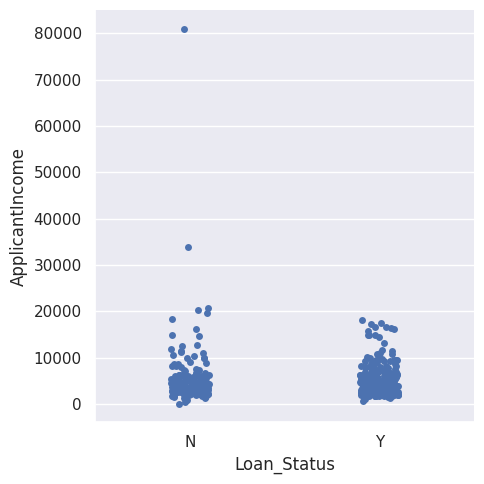

In [ ]:
# TODO : Let's know the contribution of Applicant Income on determining Loan_Status
sb.catplot(x = 'Loan_Status', y = 'ApplicantIncome', data = loan_train)

#Co-applicant Income

In [ ]:
# TODO : Descriptive Statistics on Co-applicant's Income
loan_train['CoapplicantIncome'].describe()

count      516.000000
mean      1599.092868
std       2988.146992
min          0.000000
25%          0.000000
50%       1146.500000
75%       2250.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [ ]:
# TODO : Check for null values on co-applicant income column
loan_train['CoapplicantIncome'].isnull().sum()

0

<ipython-input-87-891343b27046>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(loan_train['CoapplicantIncome'], rug = True, color = 'r')


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

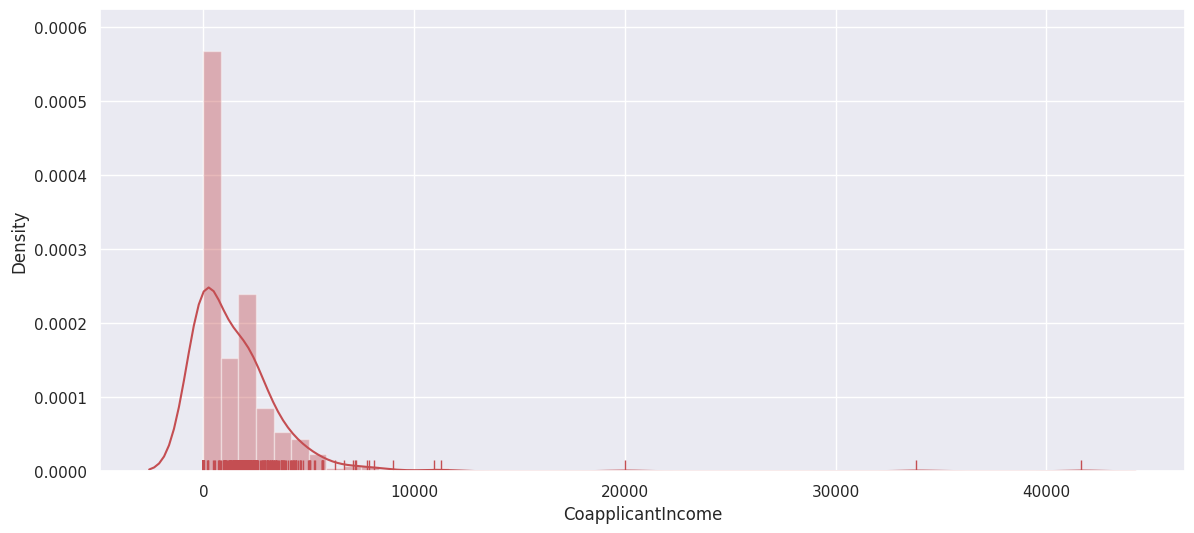

In [ ]:
plt.figure(figsize = (14, 6))
sb.distplot(loan_train['CoapplicantIncome'], rug = True, color = 'r')
# plt.savefig('../images/CoapplicantIncomeDistribution.png')

In [ ]:
# TODO : Let's get the different values counts on CoapplicantIncome column
loan_train['CoapplicantIncome'].value_counts()

0.0       232
1666.0      5
2500.0      4
2083.0      3
2250.0      3
         ... 
1250.0      1
3021.0      1
983.0       1
1775.0      1
240.0       1
Name: CoapplicantIncome, Length: 246, dtype: int64

#LoanAmount

In [ ]:
# TODO : Descriptive Statistics on LoanAmount
loan_train['LoanAmount'].describe()

count    505.000000
mean     140.904950
std       70.198124
min        9.000000
25%      100.000000
50%      128.000000
75%      167.000000
max      570.000000
Name: LoanAmount, dtype: float64

<ipython-input-90-aa82273b1e3c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(loan_train['LoanAmount'], rug = True, color = 'r')


<Axes: xlabel='LoanAmount', ylabel='Density'>

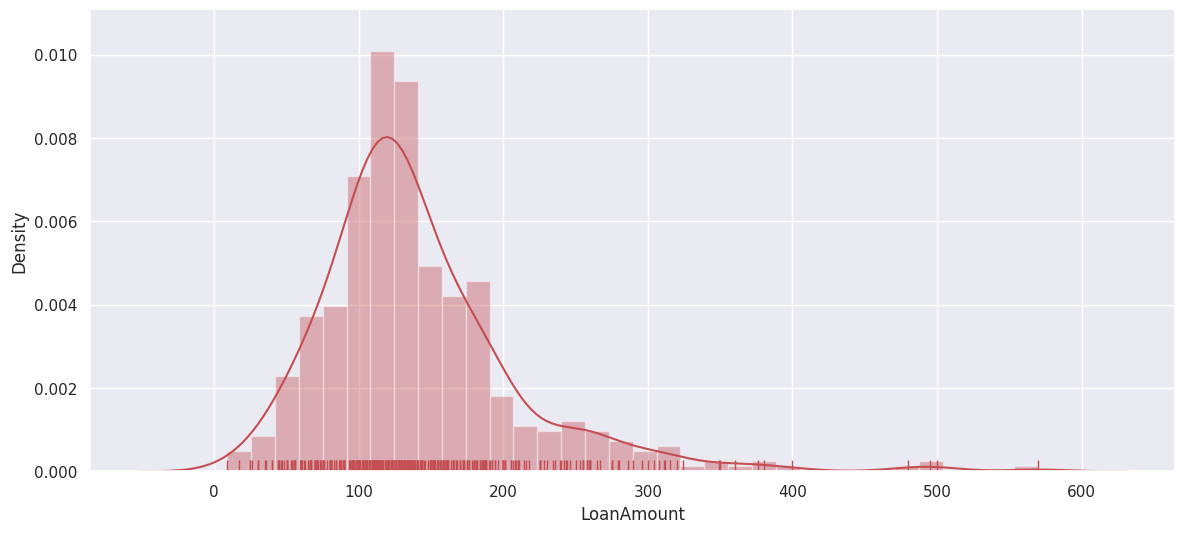

In [ ]:
# TODO : Distribution of LoanAmount
plt.figure(figsize = (14, 6))
sb.distplot(loan_train['LoanAmount'], rug = True, color = 'r')
# plt.savefig('../images/LoanAmountDistribution.png')

In [ ]:
# TODO : Let's know the different LoanAmount
loan_train['LoanAmount'].value_counts()

110.0    14
100.0    14
120.0    13
187.0    12
128.0    10
         ..
280.0     1
72.0      1
240.0     1
214.0     1
253.0     1
Name: LoanAmount, Length: 190, dtype: int64